<h2>Równanie dyfuzji (1d)</h2>
<p>Równanie dyfuzji w jednym wymiarze przyjmuje następującą postać:</p>
<p>$$ \frac{\partial u}{\partial t}= D \frac{\partial^2u}{\partial x^2}$$</p>
<p> </p>
<p>Aby określić funkcje $u(x,t)$ musimy znać stan początkowy i warunku brzegowe.</p>
<p>$$ u(x=a,t=0)=u_a \textbf{ oraz } u(x=b,t=0)=u_b$$  </p>
<p>lub</p>
<p>$$ u'(x=a,t=0)=J_a \textbf{ oraz } u'(x=b,t=0)=J_b$$</p>

<h2>Dyskretny operator Laplace'a</h2>
<p>Zaczynamy od dyskretnej postaci operatora Laplace'a:</p>
<p>Można przestawić go jako złożenie dwóch operatorów różnic skończonych, najlepiej w przód i w tył, tak by efekt był symetryczny.</p>

In [1]:
N=7
B=-identity_matrix(N)
for i in range(1,B.ncols()):
    B[i-1,i]=1
A=identity_matrix(N)
for i in range(1,A.ncols()):
    A[i,i-1]=-1
show(B,A,"=")
show(B*A)

[-1  1  0  0  0  0  0]
[ 0 -1  1  0  0  0  0]
[ 0  0 -1  1  0  0  0]
[ 0  0  0 -1  1  0  0]
[ 0  0  0  0 -1  1  0]
[ 0  0  0  0  0 -1  1]
[ 0  0  0  0  0  0 -1] [ 1  0  0  0  0  0  0]
[-1  1  0  0  0  0  0]
[ 0 -1  1  0  0  0  0]
[ 0  0 -1  1  0  0  0]
[ 0  0  0 -1  1  0  0]
[ 0  0  0  0 -1  1  0]
[ 0  0  0  0  0 -1  1] '='

[-2  1  0  0  0  0  0]
[ 1 -2  1  0  0  0  0]
[ 0  1 -2  1  0  0  0]
[ 0  0  1 -2  1  0  0]
[ 0  0  0  1 -2  1  0]
[ 0  0  0  0  1 -2  1]
[ 0  0  0  0  0  1 -1]

In [2]:
f = vector( [var('f%d'%i) for i in range(N)])
show(f.column())

[f0]
[f1]
[f2]
[f3]
[f4]
[f5]
[f6]

Poniżej zastąp `A*f` np. przez `A*B*f`:

In [6]:
show(B,f.column(),"=",(A*f).column())

[-1  1  0  0  0  0  0]
[ 0 -1  1  0  0  0  0]
[ 0  0 -1  1  0  0  0]
[ 0  0  0 -1  1  0  0]
[ 0  0  0  0 -1  1  0]
[ 0  0  0  0  0 -1  1]
[ 0  0  0  0  0  0 -1] [f0]
[f1]
[f2]
[f3]
[f4]
[f5]
[f6] '=' [      f0]
[-f0 + f1]
[-f1 + f2]
[-f2 + f3]
[-f3 + f4]
[-f4 + f5]
[-f5 + f6]

<p>Można też wykonać bezpośrednią konstrukcję korzystając z przybliżenia drugiej pochodnej:</p>
<p>$$ \displaystyle \frac{f(x_{i+1})-2 f(x_i)+f(x_{i-1}) }{h^2}\simeq  \frac{\partial^2f(x)}{\partial x^2}(x_i)$$</p>
<p>Możemy napisać:</p>
<p>$$\nabla^2 f(x) = \frac{1}{h^2} L \mathbf{f},  $$</p>
<p>gdzie:</p>
<p>$$ L = \left(\begin{array}{rrrr} -2.0 & 1.0 & 0.0 & 0.0 \\ 1.0 & -2.0 & 1.0 & 0.0 \\ 0.0 & 1.0 & -2.0 & 1.0 \\ 0.0 & 0.0 & 1.0 & -2.0 \end{array}\right)$$</p>
<p>a $\mathbf{f}$ jest wektorem wartości funkcji wypróbkowanym na dziedzinie.</p>
<p> </p>
<p> </p>

Konstrukcja macierzy $L$ przez iterację po elementach:

In [6]:
N=7
L = matrix(RDF,N)
for i in range(1,N-1):
    L[i,i-1],L[i,i],L[i,i+1] = 1,-2, 1
L[0,0],L[0,1],L[0,-1] = -2, 1, 1
L[-1,-1],L[-1,-2],L[-1,0] = -2, 1, 1    
show(L[:10,:10])

[-2.0  1.0  0.0  0.0  0.0  0.0  1.0]
[ 1.0 -2.0  1.0  0.0  0.0  0.0  0.0]
[ 0.0  1.0 -2.0  1.0  0.0  0.0  0.0]
[ 0.0  0.0  1.0 -2.0  1.0  0.0  0.0]
[ 0.0  0.0  0.0  1.0 -2.0  1.0  0.0]
[ 0.0  0.0  0.0  0.0  1.0 -2.0  1.0]
[ 1.0  0.0  0.0  0.0  0.0  1.0 -2.0]

<p>Można też skorzystać z definicji i obliczyć przybliżenie pochodnej stosując technikę "array slicing". Na przykład używając wydajnych numerycznie tablic numpy mamy:</p>

In [7]:
import numpy as np
u = np.random.randint(5,size=10)*1.0
a = np.zeros_like(u)
b = np.zeros_like(u)
c = np.zeros_like(u)
d = np.zeros_like(u)
a[1:-1]=u[2:]-2.0*u[1:-1]+u[:-2]
b[1:-1]=u[2:]
c[1:-1]=-2.0*u[1:-1]
d[1:-1]=u[:-2]

In [8]:
u,d,b,c

(array([ 3.,  3.,  4.,  2.,  1.,  0.,  4.,  3.,  4.,  3.]),
 array([ 0.,  3.,  3.,  4.,  2.,  1.,  0.,  4.,  3.,  0.]),
 array([ 0.,  4.,  2.,  1.,  0.,  4.,  3.,  4.,  3.,  0.]),
 array([ 0., -6., -8., -4., -2., -0., -8., -6., -8.,  0.]))

<p>Dalej, będziemy dla wygody stosować skonczony operator liniowy $L$.  Zobaczny jak działa taki operator na dolowlną funkcję wypróbkowaną na równoodległych punktach</p>

In [9]:
f = vector( [var('f%d'%i) for i in range(N)])
show(L,".",f.column(), "=", (L*f).column() )

[-2.0  1.0  0.0  0.0  0.0  0.0  1.0]
[ 1.0 -2.0  1.0  0.0  0.0  0.0  0.0]
[ 0.0  1.0 -2.0  1.0  0.0  0.0  0.0]
[ 0.0  0.0  1.0 -2.0  1.0  0.0  0.0]
[ 0.0  0.0  0.0  1.0 -2.0  1.0  0.0]
[ 0.0  0.0  0.0  0.0  1.0 -2.0  1.0]
[ 1.0  0.0  0.0  0.0  0.0  1.0 -2.0] '.' [f0]
[f1]
[f2]
[f3]
[f4]
[f5]
[f6] '=' [-2.0*f0 + 1.0*f1 + 1.0*f6]
[     f0 - 2.0*f1 + 1.0*f2]
[     f1 - 2.0*f2 + 1.0*f3]
[     f2 - 2.0*f3 + 1.0*f4]
[     f3 - 2.0*f4 + 1.0*f5]
[     f4 - 2.0*f5 + 1.0*f6]
[     f0 + 1.0*f5 - 2.0*f6]

In [10]:
#print  latex(L), latex(f.column()), latex((L*f).column() )
#var('dt,D')
#f = vector( [var('u_i%d'%i) for i in range(N)])
#print latex(identity_matrix(N)),latex(dt*D), latex(L), latex(f.column()), latex((L*f).column() )

<h2>Numeryczne rozwiązywanie jednowymiarowego równania dyfuzji</h2>
<p>Równanie dyfuzji możemy zdyskretyzować w dziedzinie czasowej stosując  jawny lub niejawny schemat Eulera i zastępując Laplace'an jego dyskretnym odpowiednikiem:</p>
<p>$$u^{i+1}  = u^i + \left[ \frac{D dt}{h^2} \right] Lu^i.$$</p>
<p>Schemat, jak i jego zbieżność zależą od jednej stałej $\frac{D dt}{h^2}$, zwanej też <a title="CFL" href="http://pl.wikipedia.org/wiki/Warunek_Couranta-Friedrichsa-Lewy'ego" target="_blank">liczbą Couranta</a>, w której tkwią zarówno wielkości fizyczne jak i dyskretyzacja układu. Dalej, zapisując układ iteracji jako:</p>
<p>$$u^{i+1}  = \left( I + L\frac{D dt}{h^2}  \right) u^i,$$</p>
<p>widzimy, że rozwiązanie jest potęgami $L_t^1,L_t^2,L_t^3,\dots,L_t^n$ operatora</p>
<p>$$L_t= I +  \frac{D dt}{h^2}  L.$$</p>
<p>Schemat niejawny zawiera wartość $u$ w  chwili $i+1$ po prawej stronie:</p>
<p>$$u^{i+1}  = u^i + \left[ \frac{D dt}{h^2} \right] Lu^{i+1},$$</p>
<p>co przepisując szukaną $u_{i+1}$ na prawą stronę daje nam niejednorodny układ rówń liniowych:</p>
<p>$$ \left( I - \frac{D dt}{h^2} L \right) u^{i+1}= u^{i}.$$</p>
<p>W przypadku małego $dt$ schematy te są równoważne. Korzystając z twierdzenia o macierzowym szeregu geometrycznym, lub rozwinięcia  w szereg Taylora funkcji  macierzowej (<a href="http://en.wikipedia.org/wiki/Matrix_function">link</a>) mamy:</p>
<p>$$ \left({I -\epsilon A}\right)^{-1} = I+\epsilon A+ \epsilon^2 A^2 \dots $$</p>
<p>Widzimy, że formalnie rozwiązując układ równań liniowych ze schematu niejawnego, biorąc wyrazy liniowe w $dt$ dostajemy schemat jawny.</p>
<p> </p>
<p> </p>

In [11]:
u = vector(RDF,[0,0,0,1,0,0,0])
print u
print L*u

(0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0)
(0.0, 0.0, 1.0, -2.0, 1.0, 0.0, 0.0)


<h2>Warunki brzegowe.</h2>
<p>Dyskretny operator Laplace'a w 1d potrzebuje wartości funkcji z dwóch węzłów sąsiadujących z węzłem w którym obliczamy wartosc laplasjanu. Jeśli punkt ten znajduje się na brzegu obszaru to brakuje informacji by obliczyć poprawny operator. Informację tą trzeba dostarczyc w postaci warunku brzegowego by problem miał jednoznaczne rozwiązanie. Przykładem warunku brzegowego może być:</p>
<ol>
<li>Warunek Dirichleta: $u(0)=u_0$. Np. wartość koncentracji na brzegu. Jeśli wartość ta jest zero to taka sytuacja jest zwana warunkiem pochłaniającym.</li>
<li>Warunek von Neumanna: $J(0) =( \partial_x u)(0)=J_0$. Np. wielkość strumienia na brzegu. Jeśli dla równania adwekcji-dyfuzji strumień przez ściankę wynosi zero to warunek jest nazywany odbijającym. </li>
<li>Okresowy warunek brzegowy: efektywne pozbycie się brzegu przez wprowadzenie innej topologii. Każdy węzeł ma identyczną wartość jak węzeł po drugiej stronie układu, którym jest najczęściej kostka n-wymiarowa. W przypadku odcinka, warunek efektywnie rozwiązuje badanie równanie na okręgu. </li>
</ol>

## Warunki Dirichleta

Załóżmy, że nakładamy warunek Dirichleta na końcach przedziału: $u_0=1$ i $u_{N-1}=2$. Oznacza to, że w ewolucji czasonej wektora $u$, wartości na brzegu będą zawsze utrzymywane "zewnetrznie" na zadanych wartościach. Biorąc jawny schemat mamy:

$$
\left(\begin{array}{r}\mathbf{u_0^{i+1}}\\u_1^{i+1}\\u_2^{i+1}\\u_3^{i+1}\\\mathbf{u_4^{i+1}}\end{array}\right) =</p>
\underbrace{
\left[    \left(\begin{array}{rrrrr}\mathbf{ 1 }& 0 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 & 0 \\ 0 & 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 & 0 \\ 0 & 0 & 0 & 0 & 1 \end{array}\right) +\frac{dt  D}{h^2}  \left(\begin{array}{rrrrr} -2.0 & 1.0 & 0.0 & 0.0 & 0.0 \\ 1.0 & -2.0 & 1.0 & 0.0 & 0.0 \\ 0.0 & 1.0 & -2.0 & 1.0 & 0.0 \\ 0.0 & 0.0 & 1.0 & -2.0 & 1.0 \\ 0.0 & 0.0 & 0.0 & 1.0 & -2.0 \end{array}\right)\right]
}_{L_t}\left(\begin{array}{r}\mathbf{u_0^i}\\u_1^i\\u_2^i\\u_3^i\\\mathbf{u_4^i}\end{array}\right)$$

otrzymamy po każdym kroku wartości $u_0^{i+1}$ i $u_4^{i+1}$, które nie będą spełniały dokładnie warunku brzegowego. Należy wieć po każdym kroku wymusić wartości:

$$u_0^{i+1}=1 \quad u_4^{i+1}=2$$ 

Zauważmy, że wtedy w kolejnym kroku wartościami krańcowymi wektora $u$ będą wielkości zgodne z warunkami i będą dawały poprawny przyczynek do swoich sąsiadów.

Warunki Dirichleta, są zwane "istotnymi warunkami brzegowymi" (essential boundary conditions). Nie da się tak zmodyfikować dyskretnego operatora $L$ by automatycznie spełniał te warunki i muszą być dołączone dodatkowo w schemacie numerycznym.


In [10]:
# Dirichlet
def init_L(N=7):

    L = matrix(RDF,N)
    for i in range(1,N-1):
        L[i,i-1],L[i,i],L[i,i+1] = 1,-2, 1
    L[0,0],L[-1,-1] = 1, 1
    return L
    
def essential_boundary_conditions(u):
    u[0] = 1.2
    u[-1] = 2.1

L = init_L(7)

show(L[:10,:10])

[ 1.0  0.0  0.0  0.0  0.0  0.0  0.0]
[ 1.0 -2.0  1.0  0.0  0.0  0.0  0.0]
[ 0.0  1.0 -2.0  1.0  0.0  0.0  0.0]
[ 0.0  0.0  1.0 -2.0  1.0  0.0  0.0]
[ 0.0  0.0  0.0  1.0 -2.0  1.0  0.0]
[ 0.0  0.0  0.0  0.0  1.0 -2.0  1.0]
[ 0.0  0.0  0.0  0.0  0.0  0.0  1.0]

<h2>Okresowy warunek brzegowy</h2>
<p>Okresowy warunek brzegowy w przypadku jednowymiarowym polega na utożsamieniu $u_0=u_{N}$. Obszar na którym rozwiązywane jest równanie jest topologicznie równoważny okręgowi. Okrąg nie posiada brzegu więc problem jest dobrze określony - nie ma gdzie zadawać warunku brzegowego. </p>
<p>Warunek ten można zaimplementowac modyfikująć dyskretny operator Laplace'a $L$ tak by:</p>
<p>$L_{0,N-1}=1$ i $L_{N-1,0}=1$. Niech $N=5$, mamy:</p>
<p>$$  \left(\begin{array}{rrrrr} -2.0 & 1.0 & 0.0 & 0.0 & 1.0 \\ 1.0 & -2.0 & 1.0 & 0.0 & 0.0 \\ 0.0 & 1.0 & -2.0 & 1.0 & 0.0 \\ 0.0 & 0.0 & 1.0 & -2.0 & 1.0 \\ 1.0 & 0.0 & 0.0 & 1.0 & -2.0 \end{array}\right) \left(\begin{array}{r} f_{0} \\ f_{1} \\ f_{2} \\ f_{3} \\ f_{4} \end{array}\right) \left(\begin{array}{r} -2.0 \, f_{0} + f_{1} + f_{4} \\ f_{0} - 2.0 \, f_{1} + f_{2} \\ f_{1} - 2.0 \, f_{2} + f_{3} \\ f_{2} - 2.0 \, f_{3} + f_{4} \\ f_{0} + f_{3} - 2.0 \, f_{4} \end{array}\right)   $$</p>
<p>Widać, że taki operator oblicza poprawnie Laplacjan dla punktów skrajcym, biarąc za brakujące punkty $u_{-1}$ i  $u_5$, odpowiednio: $u_{4}$ oraz  $u_0$.</p>
<p> </p>

In [11]:
# PBC
def init_L_pbc(N=7):
    L = matrix(RDF,N)
    for i in range(1,N-1):
        L[i,i-1],L[i,i],L[i,i+1] = 1,-2, 1
    L[0,0],L[0,1],L[0,-1] = -2, 1, 1
    L[-1,-1],L[-1,-2],L[-1,0] = -2, 1, 1    
    return L    
def essential_boundary_conditions(u):
    pass

L  = init_L_pbc(7)
show(L[:10,:10])

[-2.0  1.0  0.0  0.0  0.0  0.0  1.0]
[ 1.0 -2.0  1.0  0.0  0.0  0.0  0.0]
[ 0.0  1.0 -2.0  1.0  0.0  0.0  0.0]
[ 0.0  0.0  1.0 -2.0  1.0  0.0  0.0]
[ 0.0  0.0  0.0  1.0 -2.0  1.0  0.0]
[ 0.0  0.0  0.0  0.0  1.0 -2.0  1.0]
[ 1.0  0.0  0.0  0.0  0.0  1.0 -2.0]

In [12]:
L.rank()

7

<h2>Warunek von Neumanna</h2>
<p>W przypadku ogólnym, rozważmy  równania dające się zapisać w postaci prawa zachowania:</p>
<p>$$\frac{\partial u}{\partial t} = -  \nabla \cdot \vec J,$$</p>
<p>gdzie $J$ to strumień pola $u$. Równanie dyfuzji można przedstawić z tej postaci przy założeniu że:</p>
<p>$$\vec J = - \vec\nabla u$$</p>
<p>Jeśli równanie zawiera człon adwekcyjny (tzn proporcjonalny do pierwszej pochodnej) to strumień będzie zawierał dodatkowe człony.</p>
<p>Widać, że przypadku jednowymiarowego równania dyfizji warunek von Neumanna jest efektywnie  warunkiem na pochodną funkcji na brzegu:</p>
<p>$$\frac{u_1-u_0}{h}=-J$$</p>
<p>Przypadkiem szczególnym warunku Neumanna jest bariera odbijająca, w której zakładamy że strumień cząstek opisywanych gęstością lub stężeniem $u$ przez barierę wynosi zero. W takim przypadku można napisać operator Laplace'a, który będzie konsystentny z tym warunkiem:</p>

$$\left(\begin{array}{rrrrr} -1.0 & 1.0 & 0.0 & 0.0 & 0.0 \\ 1.0 & -2.0 & 1.0 & 0.0 & 0.0 \\ 0.0 & 1.0 & -2.0 & 1.0 & 0.0 \\ 0.0 & 0.0 & 1.0 & -2.0 & 1.0 \\ 0.0 & 0.0 & 0.0 & 1.0 & -1.0 \end{array}\right) \left(\begin{array}{r} f_{0} \\ f_{1} \\ f_{2} \\ f_{3} \\ f_{4} \end{array}\right)= \left(\begin{array}{r} -f_{0} + f_{1} \\ f_{0} - 2.0 \, f_{1} + f_{2} \\ f_{1} - 2.0 \, f_{2} + f_{3} \\ f_{2} - 2.0 \, f_{3} + f_{4} \\ f_{3} - f_{4} \end{array}\right) $$

Widać, że taki operator, zamiast drugiej pochodnej w punktach skrajnych oblicza pierwszą pochodną. Intuicyjnie,  działanie operatora ewolucji  na dowolny wektor będzie poprawiało wartość w pierwszym i ostatnim węźle tak długo aż pierwsze pochodne będą zero.

Warto odnotować, że taki operator ma rząd o jednej mniejszy od wymiaru. Wynika z tego, że rozwiązanie zerowe spełnia takie równanie. Rzeczywiście: równanie dyfuzji na obszarze z odbijającymi scianami jest spełnione jeśli w układzie nie ma cząstek! Ponadto widać, że jesli rozwiązanie jest określone co do wartości stałej multyplikatywnej.


In [13]:
# von Neumann/reflecting BC
def init_L_ref(N=7):
    L = matrix(RDF,N)
    for i in range(1,N-1):
        L[i,i-1],L[i,i],L[i,i+1] = 1,-2, 1
    L[0,0],L[0,1] = -1, 1
    L[-1,-1],L[-1,-2] = -1, 1
    return L
    
def essential_boundary_conditions(u):
    pass

L = init_L_ref(7)

show(L[:10,:10])

[-1.0  1.0  0.0  0.0  0.0  0.0  0.0]
[ 1.0 -2.0  1.0  0.0  0.0  0.0  0.0]
[ 0.0  1.0 -2.0  1.0  0.0  0.0  0.0]
[ 0.0  0.0  1.0 -2.0  1.0  0.0  0.0]
[ 0.0  0.0  0.0  1.0 -2.0  1.0  0.0]
[ 0.0  0.0  0.0  0.0  1.0 -2.0  1.0]
[ 0.0  0.0  0.0  0.0  0.0  1.0 -1.0]

In [14]:
L.rank()

6

In [15]:
Lt=identity_matrix(N)+0.40*L
eig = list(Lt.eigenvalues())
eig_s = sorted(map(lambda x:x.n(digits=3),map(real,eig)))
show(eig_s)

[-0.521, -0.299, 0.0220, 0.378, 0.699, 0.921, 1.00]

<h2>Stabilność i własności operatora $L_t$</h2>
<p> </p>
<p>Sprawdźmy wartości własne operatora $L_t=I+\frac{D dt}{h^2}L$, dla różnych wartości stałej $C=\frac{D dt}{h^2}$. Zacznijmy od małej wartości np: $C=0.2$. Dla $N=5$ i operatora z okresowymi warunkami brzegowymi otrzymujemy:</p>
<p>$$\left[0.240, 0.240, 0.511, 0.511, 0.849, 0.849, 1.00\right].$$</p>
<p>Widać, że wartości własne są rzeczywiste, dodatnie, mniejsze od jednego z wyjątkiem jednej. Ewolucja czasowa układu jest dana przez potęgi operatora $L_t$: $$L_t^1,L_t^2,L_t^3,\dots,L_t^n.$$ Oznacza to, że kolejne iteracje będą wygaszać składowe wektora wzdłuż wszystkich wektorów własnych, z wyjątkiem tego należącego do wartości jeden, która to będzie stanem stacjonarnym.</p>
<p>Niech $C=0.4$, otrzymujemy wtedy:</p>
<p>$$\left[-0.521, -0.521, 0.0220, 0.0220, 0.699, 0.699, 1.00\right]$$</p>
<p> Pojawiają  się ujemne wartości własnych, co oznacza oscylacje pomiędzy dodatnimi i ujemnymi wartościami np. stężenia w czasie. Nie jest to efekt fizyczny i jawny algorytm Eulera dla równaia dyfuzji dla $C=0.4$ jest robieżny.</p>
<p>Warto odnotować, że stała od której zależy stabilnośc zawiera w liczniku  krok czasowu a w mianowniku kwadrat kroku przestrzennego. Oznacza to, że zmniejszając dyskretyzacje przestrzeni musimy jednocześnie używać mniejszego kroku czasowego, by schemat był stabilny.   </p>

In [16]:
N=7
L = matrix(RDF,N)
for i in range(1,N-1):
    L[i,i-1],L[i,i],L[i,i+1] = 1,-2, 1
L[0,0],L[0,1],L[0,-1] = -2, 1, 1
L[-1,-1],L[-1,-2],L[-1,0] = -2, 1, 1    

def eig(C=0.01):
    
    Lt=matrix(RDF,identity_matrix(N)+C*L)
    eig = list(Lt.eigenvalues())
    l = sorted(map(lambda x:x.n(digits=3),map(real,eig)))
    
    print l[0:6],"...",l[-1]

for C in srange(0.01,1,0.1):
    eig(C)

[0.962, 0.962, 0.976, 0.976, 0.992, 0.992] ... 1.00
[0.582, 0.582, 0.731, 0.731, 0.917, 0.917] ... 1.00
[0.202, 0.202, 0.487, 0.487, 0.842, 0.842] ... 1.00
[-0.179, -0.179, 0.242, 0.242, 0.767, 0.767] ... 1.00
[-0.559, -0.559, -0.00247, -0.00247, 0.691, 0.691] ... 1.00
[-0.939, -0.939, -0.247, -0.247, 0.616, 0.616] ... 1.00
[-1.32, -1.32, -0.491, -0.491, 0.541, 0.541] ... 1.00
[-1.70, -1.70, -0.736, -0.736, 0.465, 0.465] ... 1.00
[-2.08, -2.08, -0.980, -0.980, 0.390, 0.390] ... 1.00
[-2.46, -2.46, -1.22, -1.22, 0.315, 0.315] ... 1.00


<p>Mając juz wszystkie składniki można napisać algorytm który będzie rozwiązywał numerycznie równanie dyfuzji przy zadanych warunkach brzegowych i początkowych.</p>

In [17]:
L.ncols(),L.rank()

(7, 7)

In [18]:
L = init_L_ref(45)
def essential_boundary_conditions(u):
    pass
    
Tlst=[]

Lt=matrix(RDF,identity_matrix(L.ncols())+0.2*L)
u = zero_vector(RDF,L.ncols())
u[ int(L.ncols()/2) ] = 1.0

essential_boundary_conditions(u)

for i in range(150):
    Tlst.append(u)
    u = Lt*u # schemat jawny
    essential_boundary_conditions(u)

    @interact
    def _(ti=slider(range(len(Tlst)))):
        p =list_plot(Tlst[ti],plotjoined=True)
        p += list_plot(Tlst[-1],plotjoined=True,color='gray',ymin=-0.2,ymax=1.0)
        p += list_plot(Tlst[0],plotjoined=True,color='gray')
        p.show(figsize=(9,3))

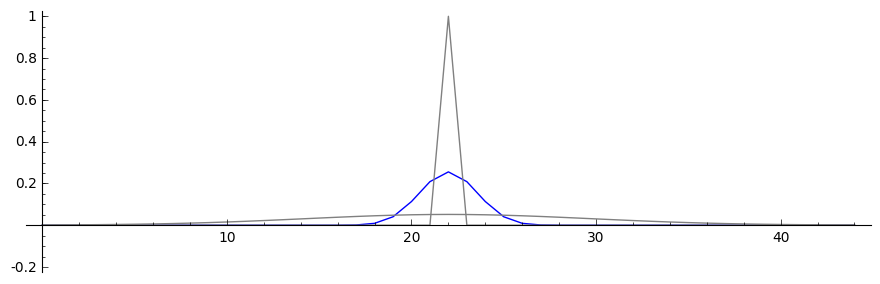

In [19]:

def vis(ti=1):
    p =list_plot(Tlst[ti],plotjoined=True)
    p += list_plot(Tlst[-1],plotjoined=True,color='gray',ymin=-0.2,ymax=1.0)
    p += list_plot(Tlst[0],plotjoined=True,color='gray')
    p.show(figsize=(9,3))
vis(6)

<p>Warunek unormowania:</p>

In [20]:
[sum(T_) for T_ in Tlst[::10]]

[1.0,
 1.0,
 0.9999999999999998,
 1.0,
 1.0,
 1.0000000000000002,
 1.0000000000000002,
 1.0000000000000002,
 1.0000000000000002,
 1.0000000000000002,
 1.0000000000000002,
 1.0000000000000002,
 1.0,
 1.0000000000000002,
 1.0000000000000002]

<h2>Numeryczne rozwiązanie równanie dyfuzji - porównanie z rozwiązaniem dokładnym.</h2>
<p>Rozważmy równanie:</p>
<p>$$ \frac{\partial u}{\partial t}= D \frac{\partial^2u}{\partial x^2}$$</p>
<p>na odcinku $(0,l)$ z odbijającymi warunkami brzegowymi. W tym celu stosujemy jawny schemat Eulera. Krok przestrzenny $h$ jest równy:</p>
<p>$$h  = \frac{l^2}{(N-1)^2}.$$</p>
<p>Wobec tego mamy następujący infinitezymalny operator ewolucji</p>
<p>$$L_t= I +  dt\frac{D  (N-1)^2}{l^2}  L u^i,$$</p>
<p>przy czym maksymalny krok czasowy zależy od parametrów układu i jest ograniczony przez:</p>
<p>$$dt_{max}<0.25 \frac{l^2}{(N-1)^2 D}. $$</p>
<p> </p>

In [21]:
N = 55
Dyf = 1.0
l = 100.
dx = l/(N-1)

dt_max = 0.2*dx^2/Dyf
dt = dt_max/2.0
C = dt*Dyf/dx^2

Nsteps = 1200

print C,dt,dx

0.100000000000000 0.342935528120713 1.85185185185185


In [22]:
print "Czas dyfuzyjny:",l^2/Dyf/dt

Czas dyfuzyjny: 29160.0000000000


In [23]:
Nsteps = int(l^2/Dyf/dt)

In [24]:
L = init_L_ref(N)
def essential_boundary_conditions(u):
    pass
    
Tlst=[]


Lt=matrix(RDF,identity_matrix(L.ncols())+C*L)
u = zero_vector(RDF,L.ncols())
u[ int(L.ncols()/5) ] = 1.0/dx

essential_boundary_conditions(u)

for i in range(Nsteps):
    Tlst.append(u)
    u = Lt*u # schemat jawny
    essential_boundary_conditions(u)
# @interact
# def vis(ti=slider(range(len(Tlst)))):
def vis(ti=0):

    p =  list_plot(Tlst[ti],plotjoined=True)
    p += list_plot(Tlst[-1],plotjoined=True,color='gray',ymin=-0.2,ymax=0.5)
    p += list_plot(Tlst[0],plotjoined=True,color='gray')
    p.show(figsize=(9,3))

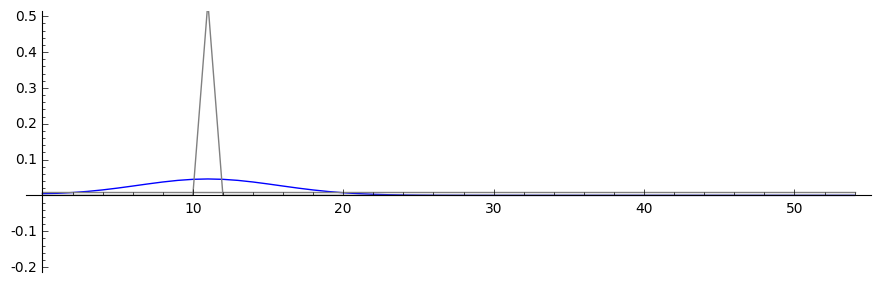

In [25]:
vis(111)

In [26]:
c(x,t)=1/sqrt(4*pi*Dyf*t)*exp(-(x^2)/(4*Dyf*t) )

print "Unormowanie wzoru analitycznego:",integrate(c(x,0.23),(x,-oo,oo))

T = [i*dt for i in range(150)] 
X = [ (-l/5. + i*dx).n() for i in range(N)]

#@interact
#def _(ti=slider(range(1,len(Tlst)))):
def vis(ti=0):
 
    print "t=",dt*ti,"Norma=",sum(Tlst[ti])*(l/(N-1))
    plt = point(zip(X,Tlst[ti]),figsize=(7,3),color='red') 
    plt +=  plot(c(x,dt*ti),(x,-l/2,l/2))
    plt.show(figsize=(8,3))

Unormowanie wzoru analitycznego: 1.0


t= 11.6598079561043 Norma= 1.0


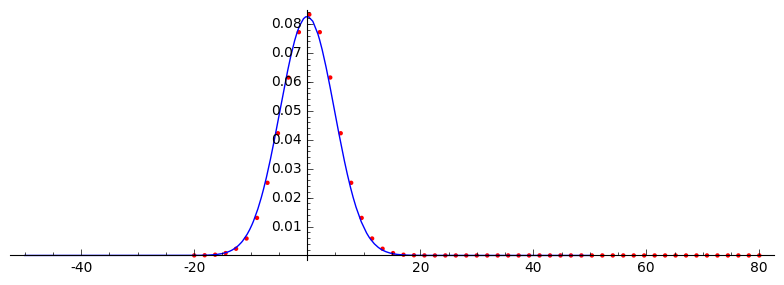

In [27]:
vis(34)

## Układ reakcji-dyfuzji: Model Fishera Kołogomorowa

Uwaga - wymaga wyjaśnienia uprzedniego operacji typu `np.diff.`


In [28]:
import numpy as np 
from scipy.sparse import dia_matrix

In [29]:
%%time
sparse = True
slicing = False

Dyf = 1.0
r = 1.0
l = 100.0 # dlugosc ukladu
t_end = 100 # czas symulacje

N = 250 # dyskretyzacja przestrzeni
h = l/(N-1) 
dt = 0.052/(Dyf*(N-1)**2/l**2) # 0.2 z warunku CFL, krok nie moze byc wiekszy

sps = int(1/dt) # liczba krokow na jednostke czasu
Nsteps=sps*t_end  # calkowita liczba krotkow 

print "sps=",sps,"dt=",dt,'Nsteps=',Nsteps

if sparse:
    L = dia_matrix( (np.array([N*[-2.],N*[1.],N*[1.]]),np.array([0,-1,1])), shape=(N,N))
if slicing:
    one = np.identity(N)
    L=np.roll(one,-1)+np.roll(one,1)-2*one
    L[0,0]=1.
    L[-1,-1]=1.




# warunek poczatkowy
u = np.zeros(N)
#u[int(N/2)-20:int(N/2)+20]=1 # step


#for i in range(1,3):
#    u[i] = 1.0 - i/3.0
u[:int(N/2)]=1

def essential_boundary_conditions(u):
    u[0] = 1.0
    u[-1] = 0.0

Tlst=[]
essential_boundary_conditions(u)

for i in range(Nsteps):
    if not i%sps:
        Tlst.append(list(u))
    if slicing:
        u[1:-1] = u[1:-1] + dt*(r*u[1:-1]*(1-u[1:-1]) + Dyf*(N-1)**2/l**2*np.diff(u,2))
    else:    
        u = u + dt*(r*u*(1-u)  + Dyf*(N-1)**2/l**2*L.dot(u))
    
    essential_boundary_conditions(u)
print "Saved ",len(Tlst), " from ", Nsteps

sps= 119 dt= 0.00838696150062096 Nsteps= 11900
Saved  100  from  11900
CPU times: user 1.54 s, sys: 4 ms, total: 1.54 s
Wall time: 1.54 s


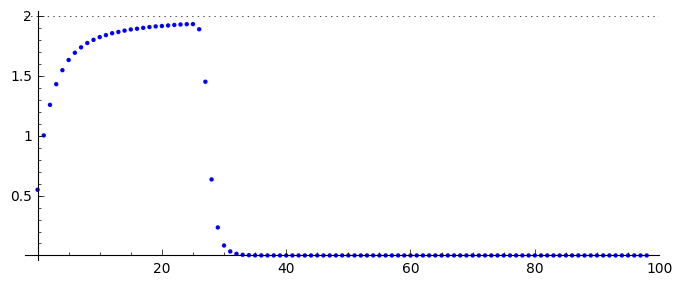

In [30]:
pos_lst = []
for T_ in Tlst:
    for (i,a),b in zip(enumerate(T_),T_[1:]):
        if a>=0.5 and b<=0.5:
            pos_lst.append( i+(a-0.5)/(a-b) ) 
        
list_plot( [l/(N-1)*(b-a)/(sps*dt) for a,b in zip(pos_lst,pos_lst[1:])] , figsize=(7,3),gridlines=[[],[2]],ymax=2)

In [31]:
#@interact
#def vis(ti=slider(range(len(Tlst)))):
def vis(ti=0):
    print r"t=",dt*ti
    p =  list_plot(Tlst[ti],plotjoined=True)
    p += list_plot(Tlst[-1],plotjoined=True,color='red',ymin=0,ymax=1.5)
    p += list_plot(Tlst[0],plotjoined=True,color='gray')
    p.show(figsize=(8,3))

t= 0.000000000000000


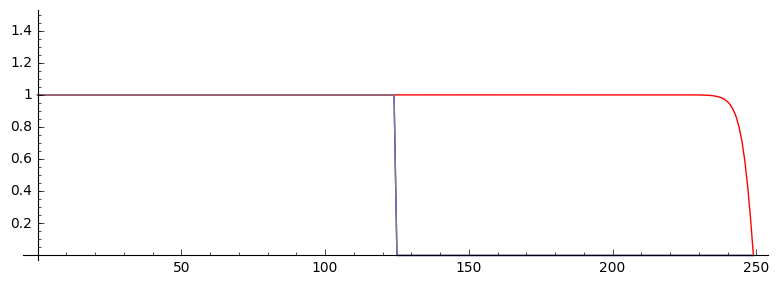

t= 0.0838696150062096


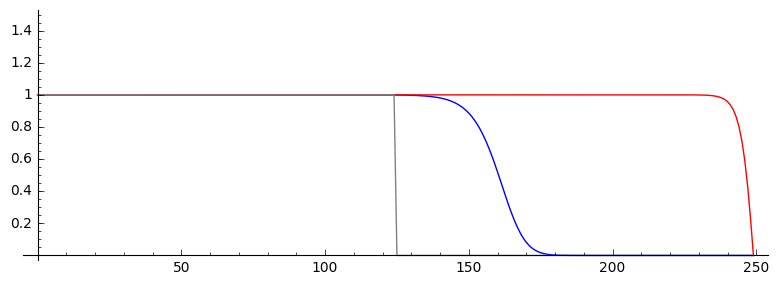

t= 0.167739230012419


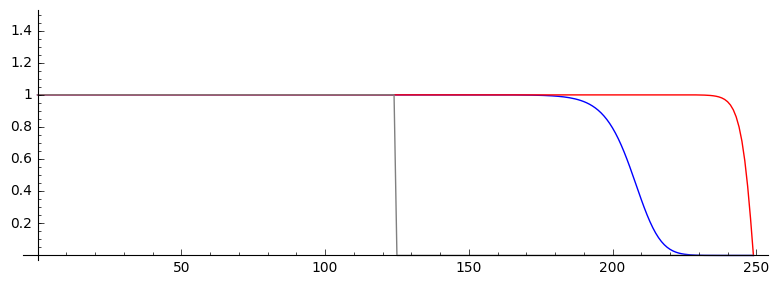

t= 0.251608845018629


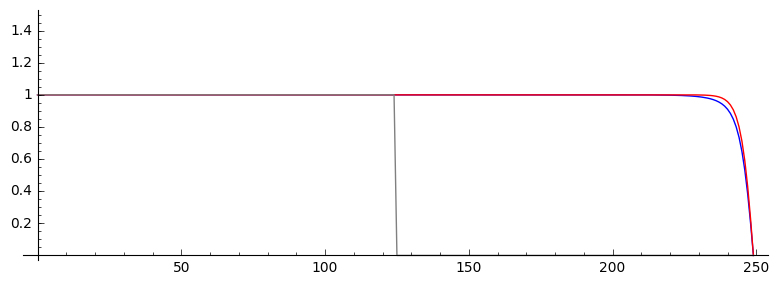

t= 0.335478460024838


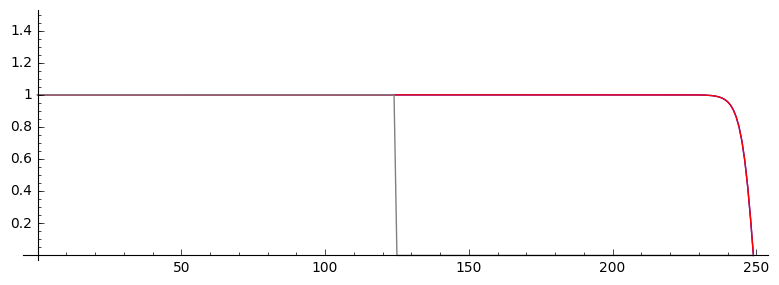

In [34]:
for ith in range(0,len(Tlst)//2,10):
    vis(ith)

## Przypadek dwuwymiarowy


In [35]:
%%time

Dyf = 1.0
r = 1.0
l = 100.0 # dlugosc ukladu
t_end = 100 # czas symulacje

N = 100 # dyskretyzacja przestrzeni
h = l/(N-1) 
dt = 0.052/(Dyf*(N-1)**2/l**2) # 0.2 z warunku CFL, krok nie moze byc wiekszy

sps = int(1/dt) # liczba krokow na jednostke czasu
Nsteps=sps*t_end  # calkowita liczba krotkow 

print "sps=",sps,"dt=",dt,'Nsteps=',Nsteps

# warunek poczatkowy
u = np.zeros((N,N))

#u[int(N/2)-5:int(N/2)+5,int(N/2)-5:int(N/2)+5]=1 # step

#u[:int(N/2)+5,:]=1.0 # step
u[int(N/2),int(N/2)]=1.0


def essential_boundary_conditions(u):
    u[:,0] = 0.0
    u[:,-1] = 0.0
    u[-1,:] = 0.0
    u[0,:] = 0.0

Tlst=[]
essential_boundary_conditions(u)

for i in range(Nsteps):
    if not i%sps:
        Tlst.append(u.copy())
    
    u[1:-1,1:-1] = u[1:-1,1:-1] + dt*(r*u[1:-1,1:-1]*(1-u[1:-1,1:-1]) + \
     Dyf*(N-1)**2/l**2*(np.diff(u,2,axis=0)[:,1:-1]+np.diff(u,2,axis=1)[1:-1,:]))
    
    essential_boundary_conditions(u)

print "Saved ",len(Tlst), " from ", Nsteps

sps= 18 dt= 0.0530558106315682 Nsteps= 1800
Saved  100  from  1800
CPU times: user 644 ms, sys: 0 ns, total: 644 ms
Wall time: 644 ms


In [36]:
import pylab

#@interact
def vis(ti=0):
    print r"t=",dt*ti
    if False: 
        pylab.clf()   
        pylab.imshow(Tlst[ti],origin='top')
        pylab.savefig('1.png',dpi=70)
    else:
        p =  matrix_plot(Tlst[ti])
        p.show(figsize=(4,4))

t= 0.000000000000000


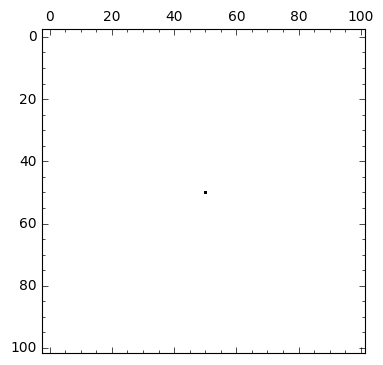

t= 0.530558106315682


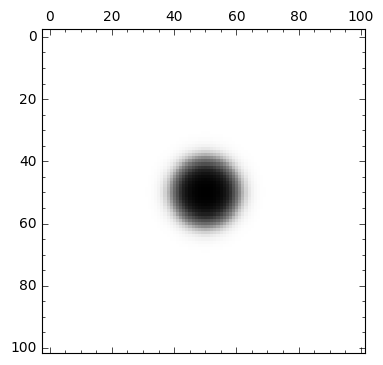

t= 1.06111621263136


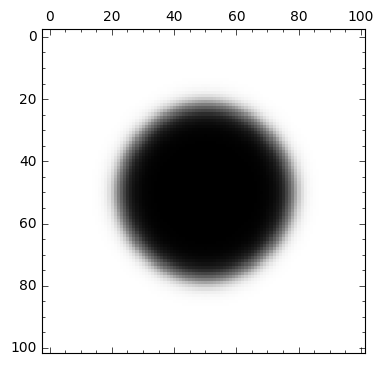

t= 1.59167431894705


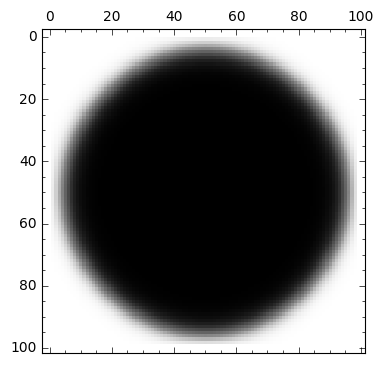

t= 2.12223242526273


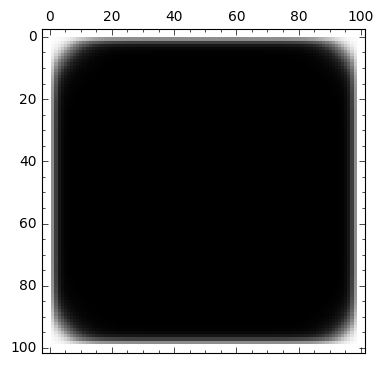

t= 2.65279053157841


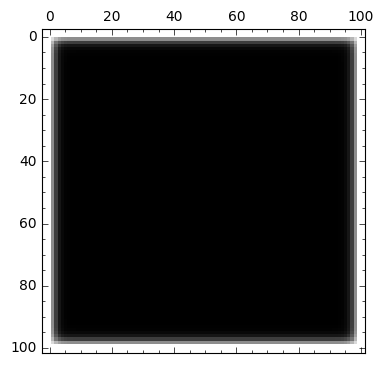

t= 3.18334863789409


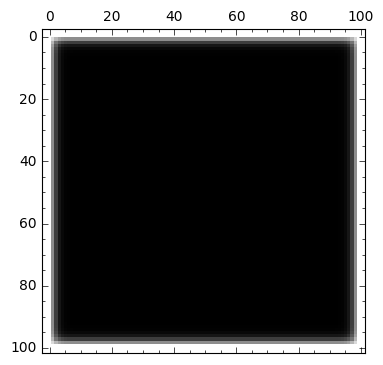

t= 3.71390674420977


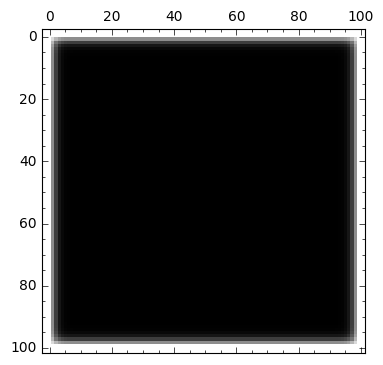

t= 4.24446485052546


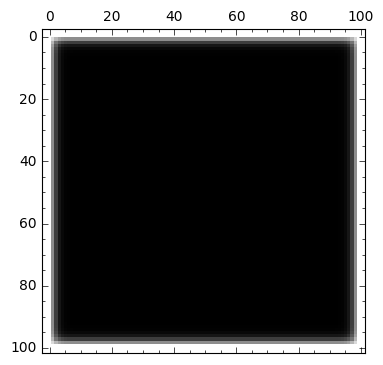

t= 4.77502295684114


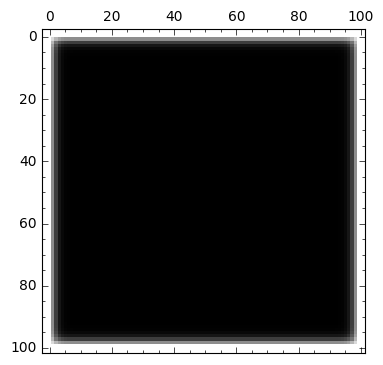

In [37]:
for ith in range(0,len(Tlst),10):
    vis(ith)

## Rozwiązania spiralne w układzie reakcji z dyfuzją (Bielousow-Zabotyński)


<p>Dynamika modelu bez dyfuzji.</p>

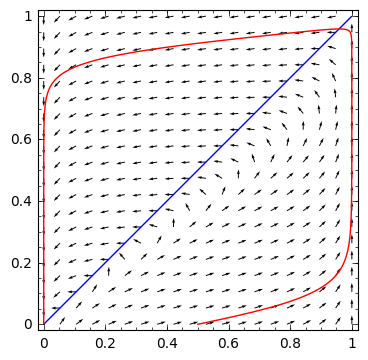

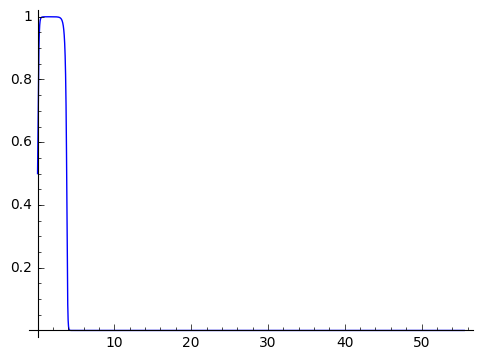

In [38]:
a=1.0
b=0.1
eps=0.1

a = 0.75
b = 0.0006
eps = 0.072

var('u v')
f(u,v) = u*(1-u)*(u-(v-b)/a)
g(u,v) = u-v
V = vector( (1/eps*f,g))
V=V/V.norm()
vfield=plot_vector_field(V,(u,0,1),(v,0,1))+implicit_plot(g,(u,0,1),(v,0,1))
t = srange(0,4/eps,0.01)
sol = desolve_odeint([19*f,g], [0.5,0.0], t, [u,v])  
plt_phase = vfield+line(sol,color='red',figsize=5)
plt_time = line(zip(t,sol[:,0]),figsize=5)
show(plt_phase)
show(plt_time)

In [39]:
%%time
import numpy as np
sparse = True
slicing = True

Dyf_u = 1.0
Dyf_v = 0.052
Dyf = max(Dyf_u,Dyf_v)

a = 1.0 
b = 0.001
eps = 0.072

l = 100.0 # dlugosc ukladu
t_end = 100 # czas symulacje

N = 160 # dyskretyzacja przestrzeni
h = l/(N-1) 
dt = 0.052/(Dyf*(N-1)**2/l**2) # 0.2 z warunku CFL, krok nie moze byc wiekszy

dt_dyn = (1.0/eps)/125.0

sps = int(1/dt) # liczba krokow na jednostke czasu
Nsteps=sps*t_end  # calkowita liczba krotkow 

print "dt,dt_dyn",dt,dt_dyn
dt = min(dt,dt_dyn)
print "sps=",sps,"dt=",dt,'Nsteps=',Nsteps

# warunek poczatkowy
u = np.zeros((N,N))
v = np.zeros((N,N))

#u[int(N/2)-5:int(N/2)+5,int(N/2)-5:int(N/2)+5]=1 # step

#u[:int(N/2)+5,:]=1.0 # step

#u[int(N/2)-5:int(N/2)+5,int(N/2)-20:int(N/2)+20]=1.0
#v[int(N/2)-5:int(N/2)+3,int(N/2)-20:int(N/2)+20]=1.0

#u[int(N/2)-5:int(N/2)+5,int(N/2)-20:int(N/2)+20]=1.0
#v[int(N/2)-5:int(N/2)+5,int(N/2)-22:int(N/2)+18]=1.0

#u[-20:-1,int(N/2)-5:int(N/2)+5]=1.0
#v[-20:-1,int(N/2)-6:int(N/2)+4]=1.0

#u[:5,:]=1.0
#v[:4,:]=1.0

#u[-10:,:]=1.0
#v[-4:,:]=1.0


u[:int(N/2),int(N/2)-5:int(N/2)+5]=1.0
v[:int(N/2),int(N/2)-6:int(N/2)+4]=1.0
# aby wymusic ruch falowy, przesuwamy u wzgledem v

def essential_boundary_conditions(u):
    u[:,0] = 0.0
    u[:,-1] = 0.0
    u[-1,:] = 0.0
    u[0,:] = 0.0
    v[:,0] = 0.0
    v[:,-1] = 0.0
    v[-1,:] = 0.0
    v[0,:] = 0.0
    

Tlst=[]
Tvlst=[]
essential_boundary_conditions(u)

for i in range(Nsteps):
    if not i%sps:
        Tlst.append(u.copy())
        Tvlst.append(v.copy())
    
    u[1:-1,1:-1] = u[1:-1,1:-1] + dt*(1.0/eps*u[1:-1,1:-1]*(1-u[1:-1,1:-1])*( u[1:-1,1:-1]-(v[1:-1,1:-1]+b)/a ) + \
     Dyf_u*(N-1)**2/l**2*(np.diff(u,2,axis=0)[:,1:-1]+np.diff(u,2,axis=1)[1:-1,:]))

    v[1:-1,1:-1] = v[1:-1,1:-1] + dt*( (u[1:-1,1:-1]-v[1:-1,1:-1]) )
    # + \
    # Dyf*(N-1)**2/l**2*(np.diff(v,2,axis=0)[:,1:-1]+np.diff(v,2,axis=1)[1:-1,:]))
    essential_boundary_conditions(u)
    
print "Saved ",len(Tlst), " from ", Nsteps

dt,dt_dyn 0.0205688066136624 0.111111111111111
sps= 48 dt= 0.0205688066136624 Nsteps= 4800
Saved  100  from  4800
CPU times: user 4.54 s, sys: 8 ms, total: 4.54 s
Wall time: 4.54 s


In [40]:
anim=animate([matrix_plot(u,cmap='jet',figsize=(2,2)) for u in Tlst[:35]])
anim.save('1.gif')

<img src='1.gif'>

In [41]:
import pylab

#@interact
def vis(ti=0):
    print r"t=",dt*ti*sps
    if False: 
        pylab.subplot(1,2,1)   
        pylab.imshow(Tlst[ti],vmin=0,vmax=1,origin='top')
        pylab.subplot(1,2,2) 
        pylab.imshow(Tvlst[ti],vmin=0,vmax=1,origin='top') 
        pylab.savefig('1.png',dpi=70)
    else:
        p =  matrix_plot(Tlst[ti])
        p.show(figsize=(4,4))

t= 11.8476326094696


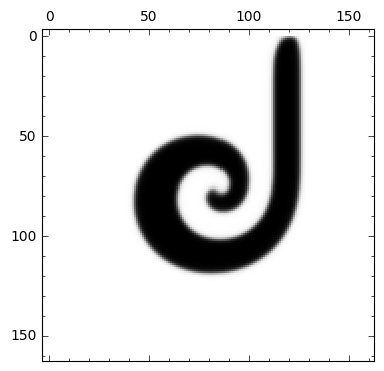

In [42]:
vis(12)